CRISP-DM Model with Titanic Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Some warnings can be ignored in the produced notebook.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###  Structure of dataset

Loading Titanic dataset file and then showing few lines data and information of column types.

In [2]:
# TODO: Loading Data and show structures of the Dataset
#file_name = 'data/titanic.csv'

df = pd.read_csv("./data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Showing summary statistics
Showing basic summary and information of the Dataset.

In [5]:
# TODO: Show summaries of the DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing values
Calculate Missing values in the Dataset.

Count NaN values in each column.

In [7]:
# TODO: Missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isna().sum().sum()

866

### Visualization
Visualize survivors, passenger ages, survival rate etc.

<AxesSubplot:ylabel='Survivor count by sex'>

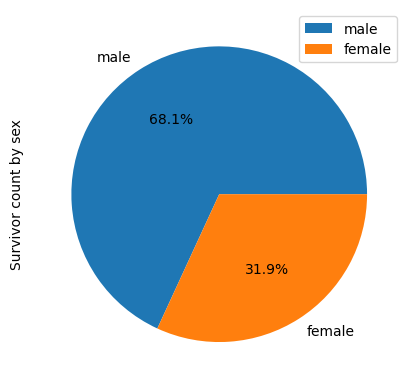

In [9]:
df_survived = df.loc[df["Survived"] == 1]["Sex"].value_counts().rename_axis("Sex").reset_index(name="Survivor count by sex")
df_survived.plot.pie(y="Survivor count by sex", labels=["male", "female"], autopct='%1.1f%%')

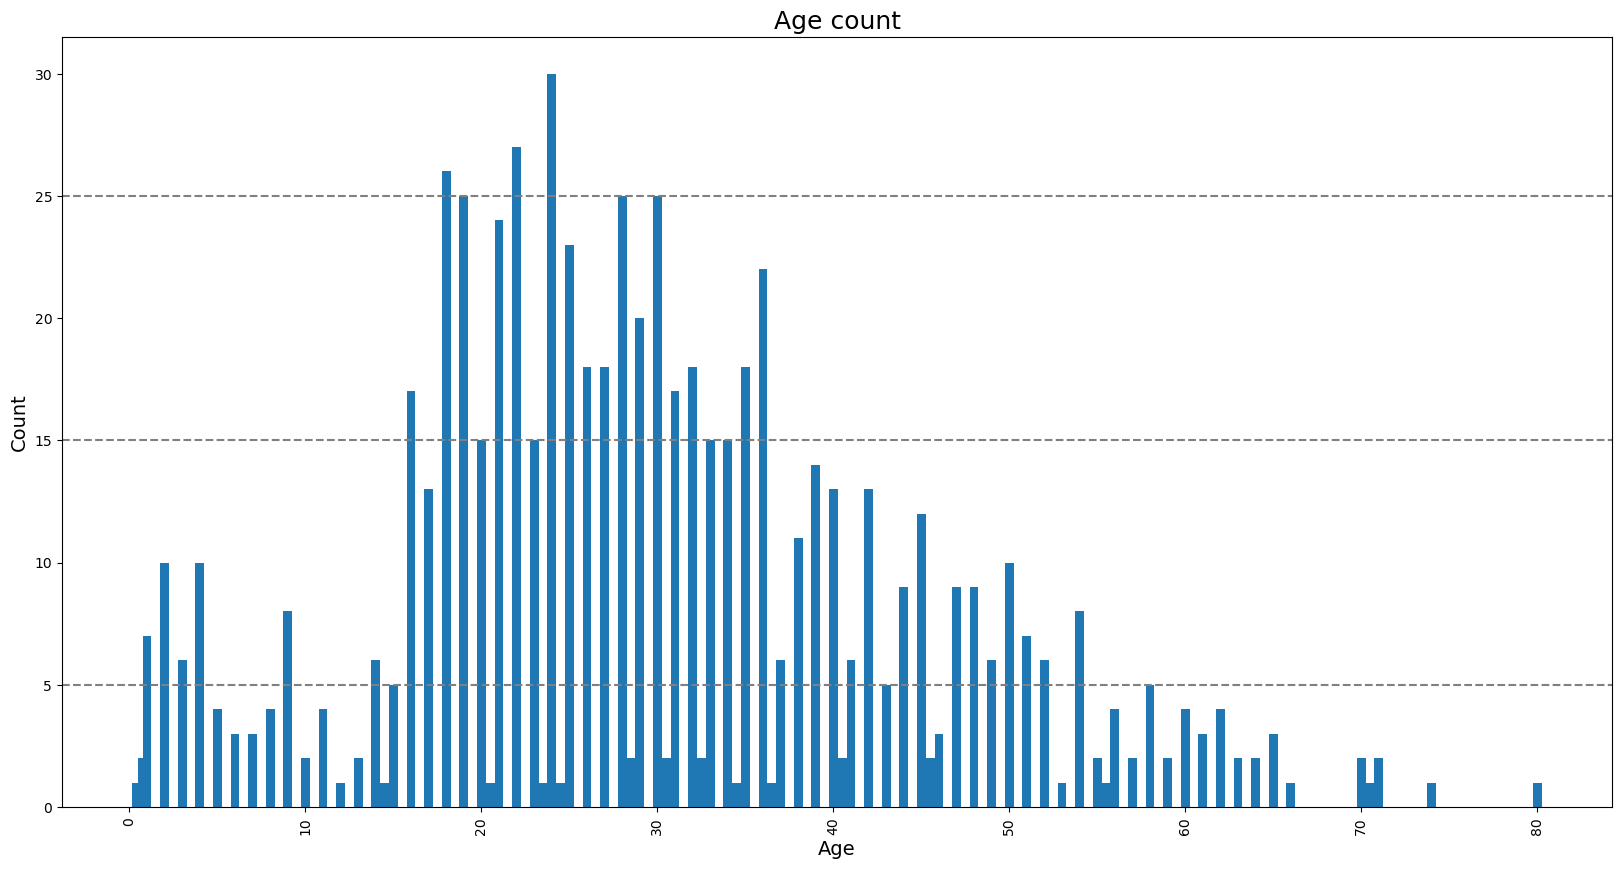

In [10]:
df_counts = df["Age"].value_counts().rename_axis("Age").reset_index(name="Age count")
df_counts.sort_values(by=["Age"], inplace=True)


fig, axs = plt.subplots(figsize=(20, 10))

axs.bar(df_counts["Age"], df_counts["Age count"], width=0.5)
axs.tick_params(axis='x', rotation=90)
axs.set_title('Age count', size=18)
axs.set_xlabel('Age', size=14)
axs.set_ylabel('Count', size=14)
plt.axhline(y=5, color='gray', linestyle='--')
plt.axhline(y=15, color='gray', linestyle='--')
plt.axhline(y=25, color='gray', linestyle='--')
plt.show()

In [11]:
df_class = pd.concat([
    df.loc[df["Survived"] == 1]["Pclass"].value_counts(),
    df["Pclass"].value_counts()], axis=1, ignore_index=True).rename(
    columns={0:"Survived", 1:"Total"})
df_class = df_class.rename_axis("Pclass").reset_index()
df_class["Rate (%)"] = (df_class["Survived"] / df_class["Total"]) * 100
df_class

,Pclass,Survived,Total,Rate (%)
0,1,136,216,62.962963
1,3,119,491,24.236253
2,2,87,184,47.282609


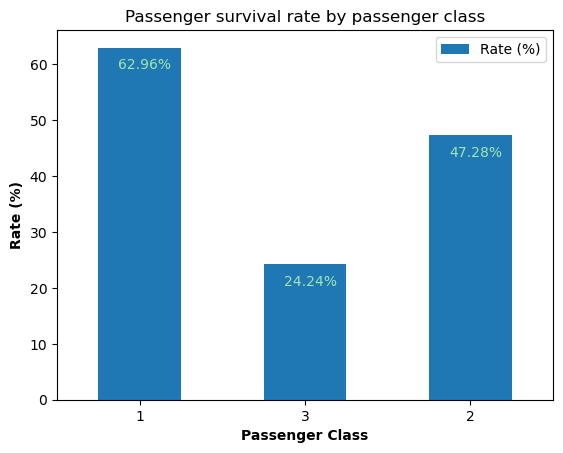

In [12]:
ax = df_class.plot.bar(
    x="Pclass",
    y="Rate (%)",
    rot=0,
    title="Passenger survival rate by passenger class")
plt.ylabel("Rate (%)", fontweight="bold")
plt.xlabel("Passenger Class", fontweight="bold")
for i, v in enumerate(df_class["Rate (%)"]):
    ax.text(i - 0.13, v - 3.85, str(round(v, 2)) + "%", color="#A0E8AF")

In [13]:
df_sex = pd.concat([
    df.loc[df["Survived"] == 1]["Sex"].value_counts(),
    df["Sex"].value_counts()], axis=1, ignore_index=True).rename(
    columns={0:"Survived", 1:"Total"})
df_sex = df_sex.rename_axis("Sex").reset_index()
df_sex["Rate (%)"] = (df_sex["Survived"] / df_sex["Total"]) * 100
df_sex

,Sex,Survived,Total,Rate (%)
0,female,233,314,74.203822
1,male,109,577,18.890815


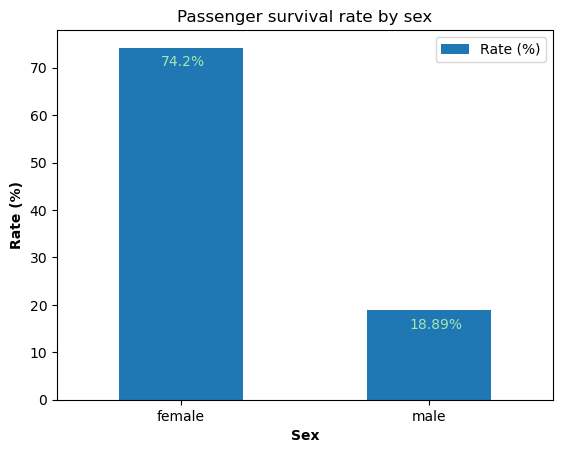

In [14]:
ax = df_sex.plot.bar(
    x="Sex",
    y="Rate (%)",
    rot=0,
    title="Passenger survival rate by sex")
plt.ylabel("Rate (%)", fontweight="bold")
plt.xlabel("Sex", fontweight="bold")
for i, v in enumerate(df_sex["Rate (%)"]):
    ax.text(i - 0.08, v - 3.85, str(round(v, 2)) + "%", color="#A0E8AF")

In [15]:
df_cs = pd.concat([
    df.loc[(df["Survived"] == 1) & (df["Sex"] == "male")]["Pclass"].value_counts(),
    df.loc[(df["Survived"] == 1) & (df["Sex"] == "female")]["Pclass"].value_counts(),
    df.loc[df["Sex"] == "male"]["Pclass"].value_counts(),
    df.loc[df["Sex"] == "female"]["Pclass"].value_counts(),
    ], axis=1, ignore_index=True).rename(
        columns={0:"male", 1:"female", 2:"Total male", 3:"Total female"}
        ).rename_axis("Pclass").reset_index()

df_cs["Rate male (%)"] =(df_cs["male"] / df_cs["Total male"]) * 100
df_cs["Rate female (%)"] = (df_cs["female"] / df_cs["Total female"]) * 100
df_cs

,Pclass,male,female,Total male,Total female,Rate male (%),Rate female (%)
0,3,47,72,347,144,13.544669,50.000000
1,1,45,91,122,94,36.885246,96.808511
2,2,17,70,108,76,15.740741,92.105263


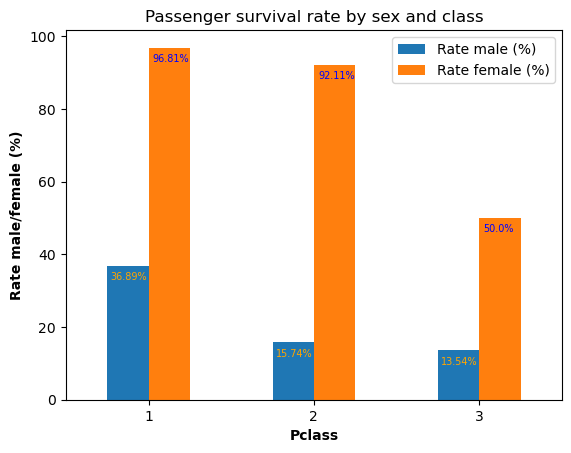

In [16]:
df_cs = df_cs[["Pclass", "Rate male (%)", "Rate female (%)"]].sort_values(by=["Pclass"])

ax = df_cs.plot.bar(
    x="Pclass",
    rot=0,
    title="Passenger survival rate by sex and class")

plt.ylabel("Rate male/female (%)", fontweight="bold")
plt.xlabel("Pclass", fontweight="bold")

for i, v in enumerate(df_cs["Rate male (%)"]):
    ax.text(i - 0.23, v - 3.85, str(round(v, 2)) + "%", color="#FFA500", fontsize=7)

for i, v in enumerate(df_cs["Rate female (%)"]):
    ax.text(i + 0.025, v - 3.85, str(round(v, 2)) + "%", color="#0000FF", fontsize=7)

### Outlier Detection

In [17]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_new = pd.concat([upper_limit, lower_limit], axis=1)
df_new.rename(columns={0:"Upper Limit", 1:"Lower Limit"}, inplace=True)
df_new

,Upper Limit,Lower Limit
PassengerId,1336.0000,-444.0000
Survived,2.5000,-1.5000
Pclass,4.5000,0.5000
Age,64.8125,-6.6875
SibSp,2.5000,-1.5000
Parch,0.0000,0.0000
Fare,65.6344,-26.7240


In [18]:
df_outlier = df.select_dtypes(include="number")
df_outlier.drop("Parch", axis=1, inplace=True)
df_outlier = df_outlier[((df_outlier < lower_limit) | (df_outlier > upper_limit))]
df_outlier.dropna(how="all", axis=0, inplace=True)
df_outlier

,PassengerId,Survived,Pclass,Age,SibSp,Fare
1,NaN,NaN,NaN,NaN,NaN,71.2833
7,NaN,NaN,NaN,NaN,3.0,NaN
16,NaN,NaN,NaN,NaN,4.0,NaN
24,NaN,NaN,NaN,NaN,3.0,NaN
27,NaN,NaN,NaN,NaN,3.0,263.0000
...,...,...,...,...,...,...
850,NaN,NaN,NaN,NaN,4.0,NaN
851,NaN,NaN,NaN,74.0,NaN,NaN
856,NaN,NaN,NaN,NaN,NaN,164.8667
863,NaN,NaN,NaN,NaN,8.0,69.5500


## 3.3: Data preprocessing (max. 4 points)

### Handling Missing Values
NaN (and Inf) values are problems for ML models.

In [19]:
df.fillna(0, inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Feature engineerin

In [20]:
df["HasCabin"] = df["Cabin"].apply(lambda x: 1 if x != 0 else 0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [21]:
df["HasEmbarked"] = df["Embarked"].apply(lambda x: 1 if x in ["C","Q","S"] else 0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


In [22]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S,0,1,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,0


In [23]:
df["Deck"] = df["Cabin"].apply(lambda x: 0 if str(x).isnumeric() else str(x)[0])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked,FamilySize,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,0,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S,0,1,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,0,C


### Visualize new features

Visualization with selected new features.

In [24]:
df_ce = pd.concat([
    df.loc[(df["Survived"] == 1) & (df["HasEmbarked"] == 1) & (df["Pclass"] == 1)][["Embarked", "Pclass"]].value_counts(),
    df.loc[(df["Survived"] == 1) & (df["HasEmbarked"] == 1) & (df["Pclass"] == 2)][["Embarked", "Pclass"]].value_counts(),
    df.loc[(df["Survived"] == 1) & (df["HasEmbarked"] == 1) & (df["Pclass"] == 3)][["Embarked", "Pclass"]].value_counts(),
    ])

df_ce = pd.concat([
    df_ce,
    pd.concat([
        df.loc[(df["HasEmbarked"] == 1) & (df["Pclass"] == 1)][["Embarked", "Pclass"]].value_counts(),
        df.loc[(df["HasEmbarked"] == 1) & (df["Pclass"] == 2)][["Embarked", "Pclass"]].value_counts(),
        df.loc[(df["HasEmbarked"] == 1) & (df["Pclass"] == 3)][["Embarked", "Pclass"]].value_counts(),
    ])
], axis=1).rename(columns={0:"Survived", 1:"Total"})

df_ce["Rate (%)"] = (df_ce["Survived"] / df_ce["Total"]) * 100

df_ce.reset_index(inplace=True)

df_ce

,Embarked,Pclass,Survived,Total,Rate (%)
0,S,1,74,127,58.267717
1,C,1,59,85,69.411765
2,Q,1,1,2,50.000000
3,S,2,76,164,46.341463
4,C,2,9,17,52.941176
5,Q,2,2,3,66.666667
6,S,3,67,353,18.980170
7,Q,3,27,72,37.500000
8,C,3,25,66,37.878788


Text(0.5, 0, 'Embarked:Pclass')

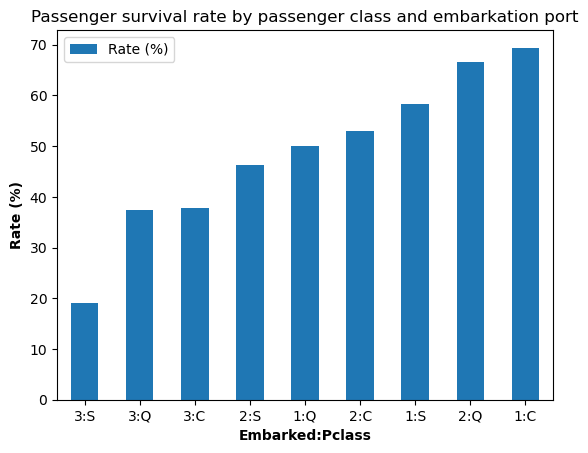

In [25]:
df_ce["Pclass"] = df_ce["Pclass"].astype(str)
df_ce["EmbPclass"] = df_ce["Pclass"] + ":" + df_ce["Embarked"]
df_ce = df_ce[["EmbPclass", "Rate (%)"]].sort_values(by=["Rate (%)"])

ax = df_ce.plot.bar(
    x="EmbPclass",
    rot=0,
    title="Passenger survival rate by passenger class and embarkation port")

plt.ylabel("Rate (%)", fontweight="bold")
plt.xlabel("Embarked:Pclass", fontweight="bold")

In [26]:
df_fam = pd.DataFrame(
    df["FamilySize"].value_counts()).reset_index().rename(
        columns={"index":"FamilySize", "FamilySize":"Total"}).set_index("FamilySize")

df_fam = df_fam.combine_first(
    pd.DataFrame(df.loc[(df["Survived"] == 1)]["FamilySize"].value_counts()).reset_index().rename(
        columns={"index":"FamilySize", "FamilySize":"Survived"}).set_index("FamilySize"))
df_fam.fillna(0, inplace=True)

df_fam["Rate (%)"] = (df_fam["Survived"] / df_fam["Total"]) * 100

Text(0.5, 0, 'FamilySize')

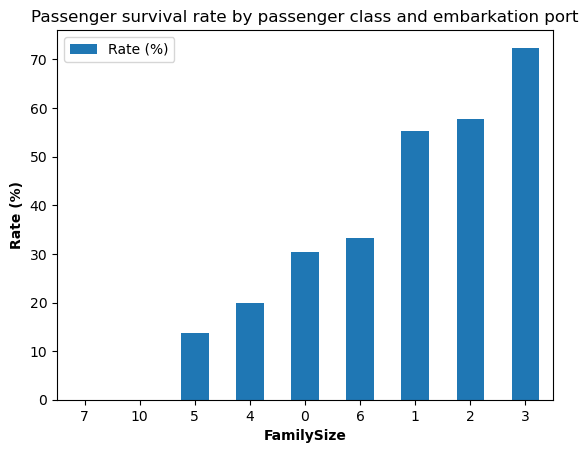

In [27]:
df_fam.reset_index(inplace=True)
df_fam = df_fam[["FamilySize", "Rate (%)"]].sort_values(by=["Rate (%)"])

ax = df_fam.plot.bar(
    x="FamilySize",
    rot=0,
    title="Passenger survival rate by passenger class and embarkation port")

plt.ylabel("Rate (%)", fontweight="bold")
plt.xlabel("FamilySize", fontweight="bold")

### Categorical Variable Encoding


In [28]:
df_enc = pd.get_dummies(df, columns = ["Sex", "Embarked", "Deck", "Cabin", "Pclass"])
df_enc

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,HasCabin,HasEmbarked,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,1,...,0,0,0,0,0,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,...,0,0,0,0,0,0,0,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,1,...,0,0,0,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,1,2,W./C. 6607,23.4500,0,1,...,0,0,0,0,0,0,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,1,...,0,0,0,0,0,0,0,1,0,0


### Feature Scaling


In [29]:
df_enc.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)
scaler = MinMaxScaler()
cols = df_enc.columns.tolist()

In [30]:
df_scaled = scaler.fit_transform(df_enc.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled

,Survived,Age,SibSp,Parch,Fare,HasCabin,HasEmbarked,FamilySize,Sex_female,Sex_male,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.2750,0.125,0.000000,0.014151,0.0,1.0,0.1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.4750,0.125,0.000000,0.139136,1.0,1.0,0.1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.3250,0.000,0.000000,0.015469,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.4375,0.125,0.000000,0.103644,1.0,1.0,0.1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.4375,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.3375,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,1.0,0.2375,0.000,0.000000,0.058556,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
888,0.0,0.0000,0.125,0.333333,0.045771,0.0,1.0,0.3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1.0,0.3250,0.000,0.000000,0.058556,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 3.4: Modelling (max. 3 points)

Target is to do **Titanic Survival Prediction with Machine Learning** and compare machine learning models for predicting passenger survival on the Titanic.

### Preprocessing Data for Machine Learning phase

In [31]:
x = df_scaled.iloc[:, 2:-1]
# predicting survival
y = df_scaled["Survived"]

### Data Splitting

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

### Modeling

1. k-Nearest Neighbors (kNN), and
2. Random Forest ML models

In [33]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
knn = KNeighborsClassifier()
knn.fit(x_train.values, y_train.values)

KNeighborsClassifier()

#### importance values

Show the importance values of an ML learning process in descending order if it's possible with the ML method used.

In [35]:
feature_importances = forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
round(feature_importance_df, 3)

,Feature,Importance
2,Fare,0.278
7,Sex_male,0.150
6,Sex_female,0.126
5,FamilySize,0.059
170,Pclass_2,0.039
...,...,...
86,Cabin_C30,0.000
64,Cabin_B79,0.000
81,Cabin_C128,0.000
75,Cabin_C111,0.000


### Evaluate

Evaluate the performance of each model.  Calculate metrics that can be compared.

In [37]:
forest_y_pred = forest.predict(x_test)

forest_accuracy = accuracy_score(y_test, forest_y_pred)
forest_precision = precision_score(y_test, forest_y_pred)
forest_recall = recall_score(y_test, forest_y_pred)
forest_f1_score = f1_score(y_test, forest_y_pred)

print("Accuracy score: " + str(forest_accuracy) + "\n")
print("precision score: " + str(forest_precision) + "\n")
print("recall score: " + str(forest_recall) + "\n")
print("f1_score: " + str(forest_f1_score) + "\n")

Accuracy score: 0.7653631284916201

precision score: 0.7142857142857143

recall score: 0.6521739130434783

f1_score score: 0.6818181818181819



In [38]:
knn_y_pred = knn.predict(x_test.values)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1_score = f1_score(y_test, knn_y_pred)

print("Accuracy score: " + str(knn_accuracy) + "\n")
print("precision score: " + str(knn_precision) + "\n")
print("recall score: " + str(knn_recall) + "\n")
print("f1_score: " + str(knn_f1_score) + "\n")

Accuracy score: 0.7486033519553073

precision score: 0.6935483870967742

recall score: 0.6231884057971014

f1_score score: 0.6564885496183207



### Comparison

Compare the results of the classifiers.

In [39]:
df_res = pd.DataFrame({
    "Accuracy":[knn_accuracy, forest_accuracy],
    "Precision":[knn_precision, forest_precision],
    "Recall":[knn_recall, forest_recall],
    "F1_Score":[knn_f1_score, forest_f1_score]
}, index=["KNeighborsClassifier", "RandomForestClassifier"])

df_res.style.highlight_max(color="#90EE90", axis=0).highlight_min(color="#FF999C", axis=0)

,Accuracy,Precision,Recall,F1_Score
KNeighborsClassifier,0.748603,0.693548,0.623188,0.656489
RandomForestClassifier,0.765363,0.714286,0.652174,0.681818


### Conclusion

Based on the analysis of the *Titanic passenger dataset* using two different classifiers, namely the *k-Nearest Neighbors* and **Random Forest**, I have obtained insightful results regarding their performance in predicting survival outcomes.

The *Random Forest classifier* demonstrated an accuracy score of approximately **0.777**, indicating that it correctly predicted survival outcomes for around **77.7%** of the passengers in the testing dataset. Additionally, it yielded a precision score of about **0.714**, suggesting that among the passengers predicted to survive, approximately **71.4%** actually survived. The recall score of approximately **0.652** implies that the model correctly identified around **65.2%** of the actual survivors. Furthermore, the F1-score, which considers both precision and recall, stands at about **0.682**.

On the other hand, the *k-Nearest Neighbors* classifier achieved a slightly lower accuracy score of approximately **0.749**. This implies that it correctly predicted survival outcomes for about **74.9%** of the passengers in the testing dataset. Its precision score, measuring the accuracy of positive predictions, is approximately **0.694**, while the recall score, representing the ability to find all positive instances, is around **0.623**. Consequently, the F1-score for kNN stands at approximately **0.656**.

In comparing the performance of these two classifiers, I observed that the *Random Forest classifier* generally outperforms the *k-Nearest Neighbors* classifier across all metrics evaluated. It demonstrates higher accuracy, precision, recall, and F1-score values, indicating its superiority in predicting survival outcomes for Titanic passengers based on the features included in the dataset.

These findings suggest that the *Random Forest classifier* is more suitable for survival prediction in this context.